In [44]:
#Importing dependencies 
import pandas as pd
import os 
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#Defining path to file
file_path = "Resources/Trips_VISTA_1220_LGA_v1.csv"

In [46]:
#Reading the csv file.
file = pd.read_csv(file_path, low_memory=False)

In [47]:
#Checking for duplicate trip ID
file.duplicated(subset='tripid').any()

False

In [48]:
#Checking csv columns names
file.head().columns

Index(['tripid', 'persid', 'hhid', 'stops', 'tripno', 'starthour', 'startime',
       'arrhour', 'arrtime', 'triptime', 'travtime', 'waitime', 'duration',
       'cumdist', 'origplace1', 'origplace2', 'origpurp1', 'origpurp2',
       'destplace1', 'destplace2', 'destpurp1', 'destpurp2', 'origLGA',
       'destLGA', 'trippurp', 'linkmode', 'dist1', 'dist2', 'dist3', 'dist4',
       'dist5', 'dist6', 'dist7', 'dist8', 'dist9', 'dist10', 'mode1', 'mode2',
       'mode3', 'mode4', 'mode5', 'mode6', 'mode7', 'mode8', 'mode9', 'mode10',
       'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8',
       'time9', 'time10', 'wdtripwgt_LGA', 'wetripwgt_LGA'],
      dtype='object')

In [49]:
#Display file
file.head()

,tripid,persid,hhid,stops,tripno,starthour,startime,arrhour,arrtime,triptime,...,time3,time4,time5,time6,time7,time8,time9,time10,wdtripwgt_LGA,wetripwgt_LGA
0,Y12H0000101P01T01,Y12H0000101P01,Y12H0000101,1,1,8,525,9,545,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.36,NaN
1,Y12H0000101P01T02,Y12H0000101P01,Y12H0000101,1,2,17,1050,17,1075,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.36,NaN
2,Y12H0000101P02T01,Y12H0000101P02,Y12H0000101,1,1,8,500,8,520,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.69,NaN
3,Y12H0000101P02T02,Y12H0000101P02,Y12H0000101,1,2,9,540,9,550,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.69,NaN
4,Y12H0000101P02T03,Y12H0000101P02,Y12H0000101,1,3,10,600,10,610,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.69,NaN


In [50]:
#Displaying train_df Table
train_df = file

In [51]:
#Looking at removing certain columns
train_df.head().columns

Index(['tripid', 'persid', 'hhid', 'stops', 'tripno', 'starthour', 'startime',
       'arrhour', 'arrtime', 'triptime', 'travtime', 'waitime', 'duration',
       'cumdist', 'origplace1', 'origplace2', 'origpurp1', 'origpurp2',
       'destplace1', 'destplace2', 'destpurp1', 'destpurp2', 'origLGA',
       'destLGA', 'trippurp', 'linkmode', 'dist1', 'dist2', 'dist3', 'dist4',
       'dist5', 'dist6', 'dist7', 'dist8', 'dist9', 'dist10', 'mode1', 'mode2',
       'mode3', 'mode4', 'mode5', 'mode6', 'mode7', 'mode8', 'mode9', 'mode10',
       'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8',
       'time9', 'time10', 'wdtripwgt_LGA', 'wetripwgt_LGA'],
      dtype='object')

In [52]:
#Delete useless columns 
del train_df['wdtripwgt_LGA']
del train_df['wetripwgt_LGA']
del train_df['starthour']
del train_df['arrhour']
del train_df['hhid']
#Checking columns after deletion 
train_df.head().columns

Index(['tripid', 'persid', 'stops', 'tripno', 'startime', 'arrtime',
       'triptime', 'travtime', 'waitime', 'duration', 'cumdist', 'origplace1',
       'origplace2', 'origpurp1', 'origpurp2', 'destplace1', 'destplace2',
       'destpurp1', 'destpurp2', 'origLGA', 'destLGA', 'trippurp', 'linkmode',
       'dist1', 'dist2', 'dist3', 'dist4', 'dist5', 'dist6', 'dist7', 'dist8',
       'dist9', 'dist10', 'mode1', 'mode2', 'mode3', 'mode4', 'mode5', 'mode6',
       'mode7', 'mode8', 'mode9', 'mode10', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'time7', 'time8', 'time9', 'time10'],
      dtype='object')

In [53]:
#Clean up trippurp column 
train_df.drop(train_df[train_df['trippurp'] == 'Not Stated'].index, inplace = True)
train_df.drop(train_df[train_df['trippurp'] == 'Unknown Purpose'].index, inplace = True)

In [54]:
#Checking mode value to see which columns actually contain 'Trains'
for i in range(1,11,1):
    #If values in mode column does not contain any 'Train' values, delete that column
    if (train_df.loc[train_df['mode' +str(i)] == 'Train'].any().any()) == False:
        del train_df['mode'+str(i)]
        #Also delete Time and Distance column assoicated with it
        del train_df['time'+str(i)]
        del train_df['dist'+str(i)]
        print(f"Mode{i} Does not contain train values")
    else:
        print(f"Mode{i} contains train values")

Mode1 contains train values
Mode2 contains train values
Mode3 contains train values
Mode4 contains train values
Mode5 contains train values
Mode6 contains train values
Mode7 contains train values
Mode8 Does not contain train values
Mode9 Does not contain train values
Mode10 Does not contain train values


In [55]:
#Extract year from trip id 
#Create empty list to hold year values
year = []
#Loop through data, and append year value into list
for i in range(len(train_df)):
    year.append("20" + train_df['tripid'].iloc[i][1:3])

In [56]:
#Adding year column into dataframe
train_df.insert(loc = 2,
               column = 'Year',
               value = year)

In [57]:
train_df.head().columns

Index(['tripid', 'persid', 'Year', 'stops', 'tripno', 'startime', 'arrtime',
       'triptime', 'travtime', 'waitime', 'duration', 'cumdist', 'origplace1',
       'origplace2', 'origpurp1', 'origpurp2', 'destplace1', 'destplace2',
       'destpurp1', 'destpurp2', 'origLGA', 'destLGA', 'trippurp', 'linkmode',
       'dist1', 'dist2', 'dist3', 'dist4', 'dist5', 'dist6', 'dist7', 'mode1',
       'mode2', 'mode3', 'mode4', 'mode5', 'mode6', 'mode7', 'time1', 'time2',
       'time3', 'time4', 'time5', 'time6', 'time7'],
      dtype='object')

In [58]:
#checking all columns for any NaN values 
for value in train_df.columns:
    if train_df[value].isna().any() == True:
        print(f"{value} column contains NaN values")

duration column contains NaN values
origplace2 column contains NaN values
dist2 column contains NaN values
dist3 column contains NaN values
dist4 column contains NaN values
dist5 column contains NaN values
dist6 column contains NaN values
dist7 column contains NaN values
mode2 column contains NaN values
mode3 column contains NaN values
mode4 column contains NaN values
mode5 column contains NaN values
mode6 column contains NaN values
mode7 column contains NaN values
time2 column contains NaN values
time3 column contains NaN values
time4 column contains NaN values
time5 column contains NaN values
time6 column contains NaN values
time7 column contains NaN values


In [59]:
#Replacing NaN values with zero
train_df = train_df.fillna(0)

In [60]:
#Changing LGA values to match other datasets 
train_df = train_df.replace({'Whittlesea (C)':'Whittlesea C', 'Banyule (C)':'Banyule C', 'Hume (C)':'Hume C',
                                        'Whitehorse (C)':'Whitehorse C','Darebin (C)':'Darebin C', 
                                        'Knox (C)':'Knox C', 'Maroondah (C)':'Maroondah C',
                                        'Nillumbik (S)':'Nillumbik S','Manningham (C)':'Manningham C', 
                                        'Maribyrnong (C)':'Maribyrnong C', 'Moreland (C)':'Moreland C',
                                        'Boroondara (C)':'Boroondara C', 'Yarra (C)':'Yarra C', 'Melton (C)':'Melton C',
                                        'Brimbank (C)':'Brimbank C','Melbourne (C)':'Melbourne C', 
                                        'Frankston (C)':'Frankston C', 'Greater Dandenong (C)':'Greater Dandenong C',
                                        'Kingston (C) (Vic.)':'Kingston C', 'Mornington Peninsula (S)':'Mornington Peninsula S',
                                        'Hobsons Bay (C)':'Hobsons Bay C', 'Monash (C)':'Monash C', 
                                        'Stonnington (C)':'Stonnington C', 'Wyndham (C)':'Wyndham C','Glen Eira (C)':'Glen Eira C',
                                        'Port Phillip (C)':'Port Phillip C', 'Bayside (C)':'Bayside C','Greater Geelong (C)':'Greater Geelong C',
                                        'Casey (C)':'Casey C', 'Moonee Valley C':'Moonee Valley C','Macedon Ranges (S)':'Macedon Ranges S', 
                                        'Yarra Ranges (S)':'Yarra Ranges S', 'Moorabool (S)':'Moorabool S','Cardinia (S)':'Cardinia S',
                                        'Queenscliffe (B)':'Queenscliffe B', 'Golden Plains (S)':'Golden Plains S','Murrindindi (S)':'Murrindindi S',
                                        'Surf Coast (S)':'Surf Coast S', 'Mitchell (S)':'Mitchell S','Moonee Valley (C)':'Moonee Valley C',
                                        'Baw Baw (S)':'Baw Baw S',
                                        'Latrobe (C) (Vic.)':'Latrobe C',
                                        'Mansfield (S)':'Mansfield S',
                                        'Wellington (S)':'Wellington S',
                                        'Ballarat (C)':'Ballarat C',
                                        'Colac-Otway (S)':'Colac-Otway S',
                                        'South Gippsland (S)':'South Gippsland S',
                                        'Hepburn (S)':'Hepburn S',
                                        'Bass Coast (S)':'Bass Coast S',
                                        'Central Goldfields (S)':'Central Goldfields S',
                                        'Southern Grampians (S)':'Southern Grampians S',
                                        'Strathbogie (S)':'Strathbogie S',
                                        'East Gippsland (S)':'East Gippsland S',
                                        'Greater Bendigo (C)':'Greater Bendigo C',
                                        'Alpine (S)':'Alpine S',
                                        'Greater Shepparton (C)':'Greater Shepparton C',
                                        'Mount Alexander (S)':'Mount Alexander S',
                                        'West Wimmera (S)':'West Wimmera S',
                                        'Warrnambool (C)':'Warrnambool C',
                                        'Swan Hill (RC)':'Swan Hill RC',
                                        'Unincorporated Vic':'Unincorporated Vic',
                                        'Horsham (RC)':'Horsham RC',
                                        'Indigo (S)':'Indigo S',
                                        'Campaspe (S)':'Campaspe S',
                                        'Ararat (RC)':'Ararat RC',
                                        'Glenelg (S)':'Glenelg S',
                                        'Wangaratta (RC)':'Wangaratta RC',
                                        'Yarriambiack (S)':'Yarriambiack S',
                                        'Benalla (RC)':'Benalla RC',
                                        'Corangamite (S)':'Corangamite S',
                                        'Moyne (S)':'Moyne S',
                                        'Moira (S)':'Moira S',
                                        'Buloke (S)':'Buloke S',
                                        'Pyrenees (S)':'Pyrenees S',
                                        'Northern Grampians (S)':'Northern Grampians S',
                                        'Loddon (S)':'Loddon S'})

In [61]:
#Renaming columns 
train_df = train_df.rename(columns={"tripid":"Trip_ID",
                                    "persid":"Person_ID",
                                    "stops":"Total_Stops",
                                    "tripno":"Trip_Count",
                                    "startime":"Start_Time",
                                    "arrtime":"Arrival_Time",
                                    "triptime":"Trip_Time",
                                    "travtime":"Travel_Time",
                                    "waitime":"Wait_Time",
                                    "duration":"Duration",
                                    "cumdist":"Total_Distance",
                                    "origplace1":"Original_Place_1",
                                    "origpurp1":"Original_Purpose_1",
                                    "origplace2":"Original_Place_2",
                                    "origpurp2":"Original_Purpose_2",
                                    "destplace1":"Destination_1",
                                    "destpurp1":"Dest_Purpose_1",
                                    "destplace2":"Destination_2",
                                    "destpurp2":"Dest_Purpose_2",
                                    "origLGA":"Starting_LGA",
                                    "destLGA":"Ending_LGA",
                                    "trippurp":"Trip_Purpose",
                                    "linkmode":"Link_Mode",
                                    "dist1":"Dist_1",
                                    'dist2':"Dist_2",
                                    'dist3':"Dist_3",
                                    'dist4':"Dist_4",
                                    'dist5':"Dist_5",
                                    'dist6':"Dist_6",
                                    'dist7':"Dist_7",
                                    'mode1':"Mode_1",
                                    'mode2':"Mode_2",
                                    'mode3':"Mode_3",
                                    'mode4':"Mode_4",
                                    'mode5':"Mode_5",
                                    'mode6':"Mode_6",
                                    'mode7':"Mode_7",
                                    'time1':"Time_1",
                                    'time2':"Time_2",
                                    'time3':"Time_3",
                                    'time4':"Time_4",
                                    'time5':"Time_5",
                                    'time6':"Time_6",
                                    'time7':"Time_7"})

In [62]:
#Checking columns names have been changed
train_df.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

In [63]:
#Displaying dataframe
train_df.head()

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000101P01T01,Y12H0000101P01,2012,1,1,525,545,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
1,Y12H0000101P01T02,Y12H0000101P01,2012,1,2,1050,1075,25,25,0,...,0,0,0,25,0.0,0.0,0.0,0.0,0.0,0.0
2,Y12H0000101P02T01,Y12H0000101P02,2012,1,1,500,520,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
3,Y12H0000101P02T02,Y12H0000101P02,2012,1,2,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
4,Y12H0000101P02T03,Y12H0000101P02,2012,1,3,600,610,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#Create a csv file for the dataframe
train_df.to_csv("Resources/VISTA_cleaned.csv",index=False)

In [65]:
#Importing csv from Resources 
path = 'Resources/VISTA_cleaned.csv'
Vista = pd.read_csv(path)

#city_line_path = 'Resources/Station_line _map.csv'
#City_line = pd.read_csv(city_line_path)

#housing_path = 'Housing.ipynb'
#Housing = pd.read_csv(city_line_path)

/var/folders/wn/pfb13k1x40zdws69rny8gn700000gn/T/ipykernel_76555/1712626081.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  Vista = pd.read_csv(path)


In [66]:
Vista

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000101P01T01,Y12H0000101P01,2012,1,1,525,545,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
1,Y12H0000101P01T02,Y12H0000101P01,2012,1,2,1050,1075,25,25,0,...,0,0,0,25,0.0,0.0,0.0,0.0,0.0,0.0
2,Y12H0000101P02T01,Y12H0000101P02,2012,1,1,500,520,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
3,Y12H0000101P02T02,Y12H0000101P02,2012,1,2,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
4,Y12H0000101P02T03,Y12H0000101P02,2012,1,3,600,610,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205713,Y20H4001029P02T01,Y20H4001029P02,2020,1,1,600,620,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
205714,Y20H4001029P02T02,Y20H4001029P02,2020,1,2,625,640,15,15,0,...,0,0,0,15,0.0,0.0,0.0,0.0,0.0,0.0
205715,Y20H4001039P01T01,Y20H4001039P01,2020,1,1,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
205716,Y20H4001039P01T02,Y20H4001039P01,2020,1,2,590,650,60,60,0,...,0,0,0,60,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#Checking columns in dataset
Vista.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

#List of city council in merged_df
Combined = pd.read_csv('Resources/Combined.csv')
LGA_list = Combined['City council']
print(LGA_list)

#Delete rows of LGA that arent needed
for lga in Vista['Starting_LGA'].unique():
    if lga not in LGA_list:
        print(f"Dropping {lga} from dataframe")
        Vista = Vista.drop(Vista[Vista['Starting_LGA']== lga].index)
        Vista = Vista.drop(Vista[Vista['Ending_LGA']== lga].index)
Vista['Starting_LGA'].unique()

In [69]:
Vista['Starting_LGA'].unique()

array(['Whittlesea C', 'Banyule C', 'Hume C', 'Yarra C', 'Whitehorse C',
       'Darebin C', 'Knox C', 'Maroondah C', 'Nillumbik S',
       'Manningham C', 'Moreland C', 'Boroondara C', 'Melton C',
       'Brimbank C', 'Melbourne C', 'Frankston C', 'Greater Dandenong C',
       'Kingston C', 'Mornington Peninsula S', 'Hobsons Bay C',
       'Monash C', 'Stonnington C', 'Maribyrnong C', 'Wyndham C',
       'Glen Eira C', 'Port Phillip C', 'Bayside C', 'Greater Geelong C',
       'Casey C', 'Moonee Valley C', 'Macedon Ranges S', 'Yarra Ranges S',
       'Moorabool S', 'Cardinia S', 'Queenscliffe B', 'Golden Plains S',
       'Murrindindi S', 'Surf Coast S', 'Mitchell S'], dtype=object)

## Grouping the data by starting and ending LGA

In [70]:
#Grouping by starting LGA and counting the rows in each group
Start_LGA_df = Vista.groupby(by='Starting_LGA').count().reset_index(drop=False)

In [71]:
#Removing uncessary columns
Start_LGA_df = Start_LGA_df[['Starting_LGA','Trip_ID']]
#Renaming the column for merge later
Start_LGA_df = Start_LGA_df.rename(columns = {'Starting_LGA':'LGA','Trip_ID':'Starting LGA count'})

In [72]:
#Grouping by ending LGA 
Ending_LGA_df = Vista.groupby(by='Ending_LGA').count().reset_index(drop=False)

In [73]:
#Removing uncessary columns
Ending_LGA_df = Ending_LGA_df[['Ending_LGA','Trip_ID']]
#Renaming the column for merge later
Ending_LGA_df = Ending_LGA_df.rename(columns = {'Ending_LGA':'LGA','Trip_ID':'Ending LGA count'})

In [74]:
#Merge the LGA counts dataframes
LGA_count = pd.merge(Start_LGA_df,Ending_LGA_df,on='LGA')

In [75]:
#Sort by increasing starting LGA count
LGA_count = LGA_count.sort_values('Starting LGA count')

In [76]:
#Changing values to log 
LGA_count['Start Log Value'] = np.log2(LGA_count['Starting LGA count'])
LGA_count['End Log Value'] = np.log2(LGA_count['Ending LGA count'])

In [82]:
LGA_count.sort_values('Starting LGA count')
LGA_count       = LGA_count.loc[(LGA_count["LGA"] != 'Manningham C') & (LGA_count["LGA"] != 'Moreland C')
                               & (LGA_count["LGA"] != 'Murrindindi S') & (LGA_count["LGA"] != 'Golden Plains S')
                               & (LGA_count["LGA"] != 'Mitchell S') & (LGA_count["LGA"] != 'Queenscliffe B')
                               & (LGA_count["LGA"] != 'Moorabool S') & (LGA_count["LGA"] != 'Macedon Ranges S') 
                               & (LGA_count["LGA"] != 'Macedon Ranges S') & (LGA_count["LGA"] != 'Greater Geelong C')
                               & (LGA_count["LGA"] != 'Melton C')]

In [83]:
print(LGA_count)

                       LGA  Starting LGA count  Ending LGA count  \
33            Surf Coast S                 443               432   
29             Nillumbik S                2887              2877   
4               Cardinia S                3027              2979   
18           Maribyrnong C                3578              3560   
12           Hobsons Bay C                3918              3891   
1                Bayside C                4317              4297   
37                 Yarra C                4743              4739   
30          Port Phillip C                4805              4780   
24         Moonee Valley C                5459              5441   
38          Yarra Ranges S                5545              5511   
10     Greater Dandenong C                5606              5605   
32           Stonnington C                5623              5614   
35            Whittlesea C                5752              5716   
19             Maroondah C                5804  

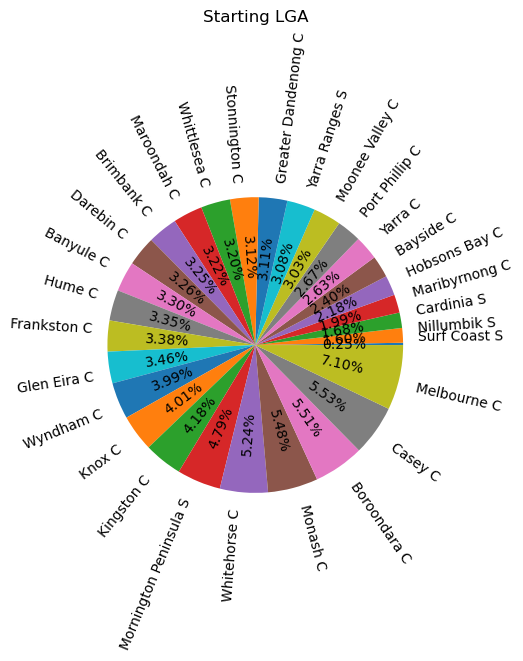

In [84]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()

sizes = LGA_count['Starting LGA count']


fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes,labels=labels,rotatelabels=True,autopct='%1.2f%%')
plt.title('Starting LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())

plt.savefig("Images/Vista_Start_LGA_Pie.png", bbox_inches='tight')
plt.show()

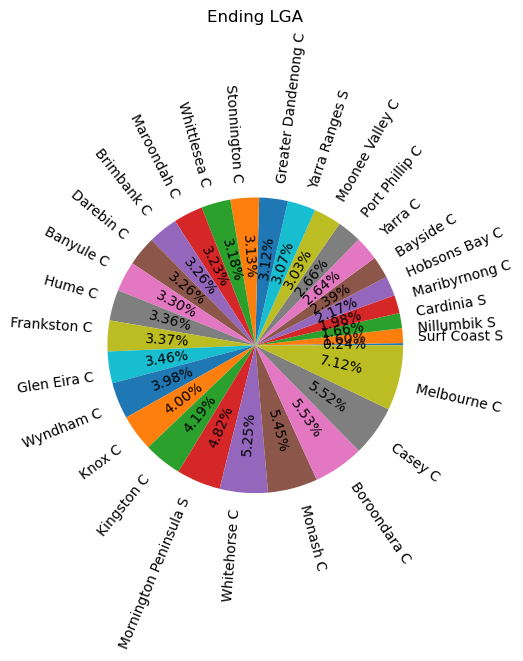

In [85]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()
sizes2= LGA_count['Ending LGA count']

fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes2,labels=labels,rotatelabels=True,autopct='%1.2f%%')
plt.title('Ending LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
    
plt.savefig("Images/Vista_End_LGA_Pie.png",bbox_inches='tight')
plt.show()

<Figure size 1500x600 with 0 Axes>

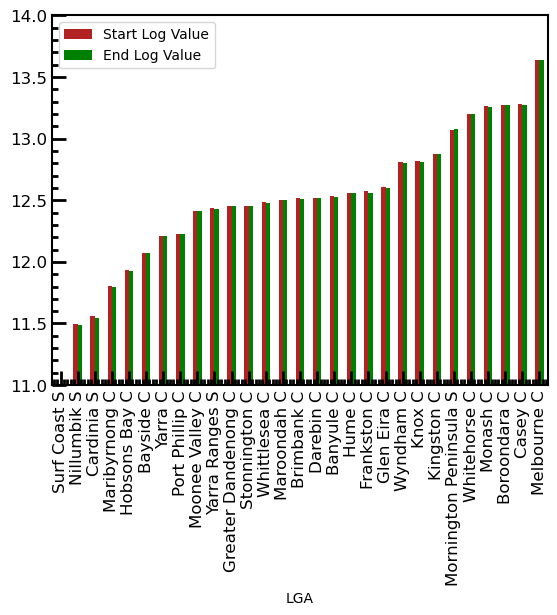

In [120]:
#Plotting log count of travel for each LGA 
fig = plt.figure(figsize=(15,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

LGA_count.plot(kind='bar',x = 'LGA',y=['Start Log Value','End Log Value'], color={'Start Log Value': "firebrick", 'End Log Value': "green"})
plt.ylim(11,14)
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=12, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')

plt.savefig("Images/Vista_bar",bbox_inches='tight')
plt.show()


## Grouping by purpose of travel

In [96]:
#Grouping by trip purpose
purpose_travel = Vista.groupby(by = 'Trip_Purpose').count()

In [97]:
#Resetting index and retrieveing only columns trip purpose and trip id
purpose_travel_df = purpose_travel.reset_index(drop=False)[['Trip_Purpose','Trip_ID']]

In [98]:
#Sorting values
purpose_travel_df = purpose_travel_df.sort_values(by='Trip_ID')

In [99]:
purpose_travel_df.head()

,Trip_Purpose,Trip_ID
1,At or Go Home,31
5,Other Purpose,992
7,Pick-up or Deliver Something,4239
3,Change Mode,6994
0,Accompany Someone,11683


## Checking the usage of Bus, Train, Tram over 2018-2020

In [100]:
#Find the total counts Link_Mode for bus train and trams (The main mode of transport)
Mode_year_df = Vista.groupby(by=['Link_Mode','Year']).count().reset_index()

In [101]:
Mode_year_df

,Link_Mode,Year,Trip_ID,Person_ID,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Bicycle,2012,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,244,244
1,Bicycle,2013,464,464,464,464,464,464,464,464,...,464,464,464,464,464,464,464,464,464,464
2,Bicycle,2014,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
3,Bicycle,2015,528,528,528,528,528,528,528,528,...,528,528,528,528,528,528,528,528,528,528
4,Bicycle,2016,419,419,419,419,419,419,419,419,...,419,419,419,419,419,419,419,419,419,419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Walking,2016,4045,4045,4045,4045,4045,4045,4045,4045,...,4045,4045,4045,4045,4045,4045,4045,4045,4045,4045
104,Walking,2017,2439,2439,2439,2439,2439,2439,2439,2439,...,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
105,Walking,2018,5005,5005,5005,5005,5005,5005,5005,5005,...,5005,5005,5005,5005,5005,5005,5005,5005,5005,5005
106,Walking,2019,3503,3503,3503,3503,3503,3503,3503,3503,...,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503


In [102]:
#Taking only years 2018-2020
Mode_year_df = Mode_year_df.loc[((Mode_year_df['Year']==2018)|(Mode_year_df['Year']==2019)|(Mode_year_df['Year']==2020))]

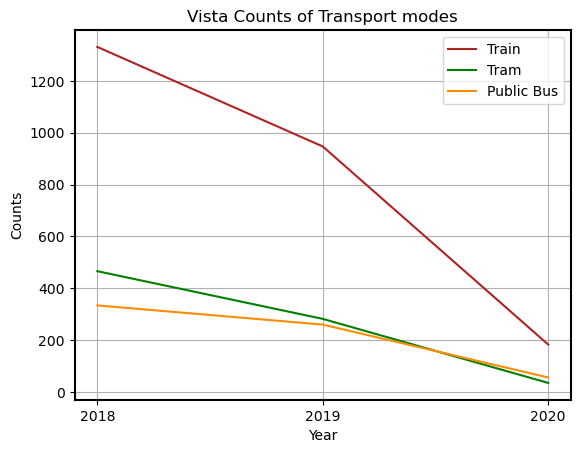

In [103]:
#Plot scatter of counts over time
plt.subplots()
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Trip_ID'],label='Train',color='firebrick')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Trip_ID'],label='Tram',color='green')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Trip_ID'],label='Public Bus',color='darkorange')

#Figure properties
plt.xticks((2018,2019,2020))
plt.title('Vista Counts of Transport modes')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid()
plt.legend()

plt.savefig("Images/Vista_Transport_Passenger_LineGraph.png",bbox_inches='tight')
plt.show()

In [104]:
#Grouping by link mode 
Mode_df = Vista.groupby(by='Link_Mode').count().reset_index()

In [105]:
#Retrieving only rows that either contain train tram or pulbic bus
Mode_df = Mode_df.loc[(Mode_df['Link_Mode']=='Train')|(Mode_df['Link_Mode']=='Tram')|(Mode_df['Link_Mode']=='Public Bus')]
Mode_df

,Link_Mode,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
5,Public Bus,2230,2230,2230,2230,2230,2230,2230,2230,2230,...,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230
8,Train,8755,8755,8755,8755,8755,8755,8755,8755,8755,...,8755,8755,8755,8755,8755,8755,8755,8755,8755,8755
9,Tram,2491,2491,2491,2491,2491,2491,2491,2491,2491,...,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491


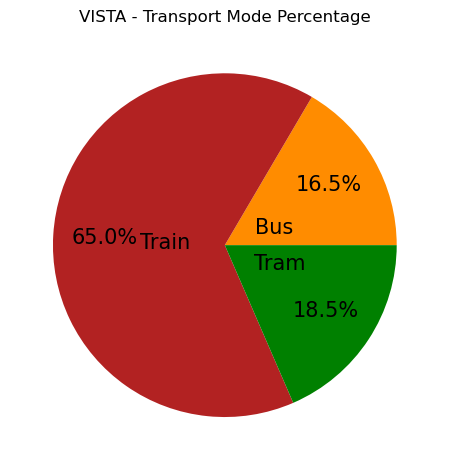

In [115]:
#Plot Pie Graph of main modes of transport stated by individuals
labels = ['Bus', 'Train','Tram']
sizes = Mode_df['Trip_ID']
colors = ['darkorange','firebrick','green']

# Plotting the pie chart
#colors = ['firebrick','green', 'darkorange']
#labels = ['Train','Tram', 'Bus']
plt.pie(sizes, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.2,pctdistance=0.70,startangle=0,textprops=dict(size=15))
plt.title('VISTA - Transport Mode Percentage')
plt.tight_layout()
plt.savefig("Images/VISTA_TotalAnnual_1Pie.png")
plt.show()

In [116]:
#Get the counts of Public Bus, Train, Tram in Mode 1 - 10
Bus_counter = 0
Train_counter = 0
Tram_counter = 0

counts_df = Vista[['Mode_1','Mode_2','Mode_3','Mode_4','Mode_5','Mode_6','Mode_7',]]

In [117]:
#Saving counts for each mode into their list
for column in counts_df:
        Bus_counter = Bus_counter + counts_df[column].value_counts()['Public Bus']
        Train_counter = Train_counter + counts_df[column].value_counts()['Train']
        Tram_counter = Tram_counter + counts_df[column].value_counts()['Tram']

In [118]:
#Turn counts into a dataframe to plot
labels = ['Bus','Train','Tram']
counts = [Bus_counter,Train_counter,Tram_counter]
data = {'Mode of Transport':labels,'Counts of Transport':counts}
Mode_counts = pd.DataFrame(data=data)

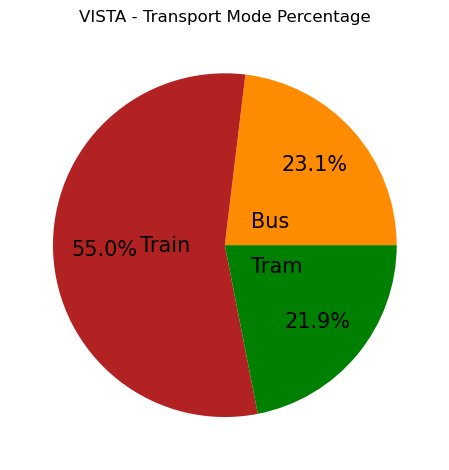

In [119]:
#Plot Pie Graph of main modes of transport stated by individuals
labels = ['Bus', 'Train','Tram']
sizes = Mode_df['Trip_ID']
colors = ['darkorange','firebrick','green']

# Plotting the pie chart
#colors = ['firebrick','green', 'darkorange']
#labels = ['Train','Tram', 'Bus']
plt.pie(counts, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.2,pctdistance=0.70,startangle=0,textprops=dict(size=15))
plt.title('VISTA - Transport Mode Percentage')
plt.tight_layout()
plt.savefig("Images/VISTA_TotalAnnual_1Pie.png")
plt.show()

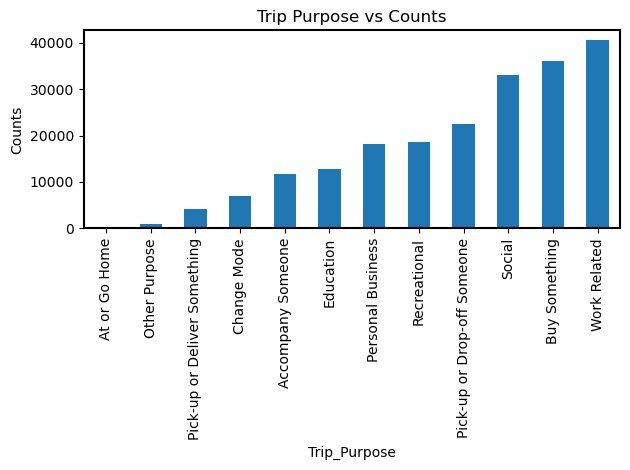

In [122]:
#Create bar graph on trip purpose 
Vista.groupby(by='Trip_Purpose').count().reset_index()[['Trip_Purpose','Trip_ID']].sort_values('Trip_ID').plot(kind='bar',x='Trip_Purpose',legend=False)
plt.ylabel('Counts')
plt.title('Trip Purpose vs Counts')
plt.tight_layout()
plt.savefig("Images/Vista_Trip_Purpose_Bargraph.png")
plt.show()

## Checking counts of trips purpose by city council area

In [123]:
#Grouping by Starting Starting LGA and Trip purpose 
lga_trip_purpose = Vista.groupby(by=['Starting_LGA','Trip_Purpose']).count().reset_index()[['Starting_LGA','Trip_Purpose','Trip_ID']]

#Sorting value based on trip ID count
lga_trip_purpose = lga_trip_purpose.sort_values('Trip_ID')

#Pivoting table
lga_trip_purpose = lga_trip_purpose.pivot(index='Trip_Purpose',columns='Starting_LGA').reset_index()

In [124]:
lga_trip_purpose

Trip_Purpose   Trip_ID                         \
Starting_LGA                               Banyule C Bayside C Boroondara C   
0                        Accompany Someone     333.0     298.0        550.0   
1                            At or Go Home       NaN       NaN          NaN   
2                            Buy Something     984.0     722.0       1580.0   
3                              Change Mode     103.0      62.0        248.0   
4                                Education     369.0     197.0        750.0   
5                            Other Purpose      31.0      24.0         59.0   
6                        Personal Business     561.0     457.0        959.0   
7             Pick-up or Deliver Something     120.0      95.0        209.0   
8              Pick-up or Drop-off Someone     698.0     432.0       1103.0   
9                             Recreational     661.0     503.0       1141.0   
10                                  Social     988.0     914.0       1675.0   
11                            Work Related    1084.0     613.0       1643.0   

                                                                              \
Starting_LGA Brimbank C Cardinia S Casey C Darebin C Frankston C Glen Eira C   
0                 343.0      242.0   641.0     350.0       409.0       377.0   
1                   3.0        1.0     1.0       NaN         NaN         1.0   
2                1032.0      631.0  1898.0    1126.0      1166.0      1015.0   
3                  83.0       23.0    74.0     145.0        69.0       107.0   
4                 442.0      194.0   820.0     377.0       329.0       474.0   
5                  18.0       15.0    27.0      38.0        37.0        33.0   
6                 519.0      311.0  1013.0     456.0       611.0       602.0   
7                  86.0       82.0   184.0      91.0       124.0       131.0   
8                 782.0      322.0  1315.0     587.0       675.0       683.0   
9                 408.0      240.0   786.0     479.0       629.0       637.0   
10                818.0      432.0  1378.0    1017.0       941.0      1087.0   
11               1325.0      534.0  1818.0    1199.0      1098.0      1080.0   

              ...                                                          \
Starting_LGA  ... Nillumbik S Port Phillip C Queenscliffe B Stonnington C   
0             ...       197.0          231.0            1.0         277.0   
1             ...         1.0            2.0            NaN           NaN   
2             ...       491.0          717.0           10.0        1062.0   
3             ...        22.0          210.0            5.0         243.0   
4             ...       252.0          141.0            NaN         242.0   
5             ...        10.0           40.0            NaN          18.0   
6             ...       319.0          383.0           16.0         473.0   
7             ...        60.0          100.0            5.0         122.0   
8             ...       345.0          350.0            1.0         542.0   
9             ...       283.0          494.0           20.0         562.0   
10            ...       442.0          960.0           27.0         992.0   
11            ...       465.0         1177.0           13.0        1090.0   

                                                                       \
Starting_LGA Surf Coast S Whitehorse C Whittlesea C Wyndham C Yarra C   
0                    19.0        563.0        340.0     511.0   162.0   
1                     NaN          NaN          NaN       NaN     NaN   
2                    65.0       1867.0       1031.0    1290.0   773.0   
3                     7.0        182.0         60.0      74.0   322.0   
4                     2.0        642.0        462.0     629.0   172.0   
5                    14.0         46.0         14.0      36.0    15.0   
6                    74.0        876.0        455.0     578.0   336.0   
7                    11.0        217.0        123.0     104.0    8

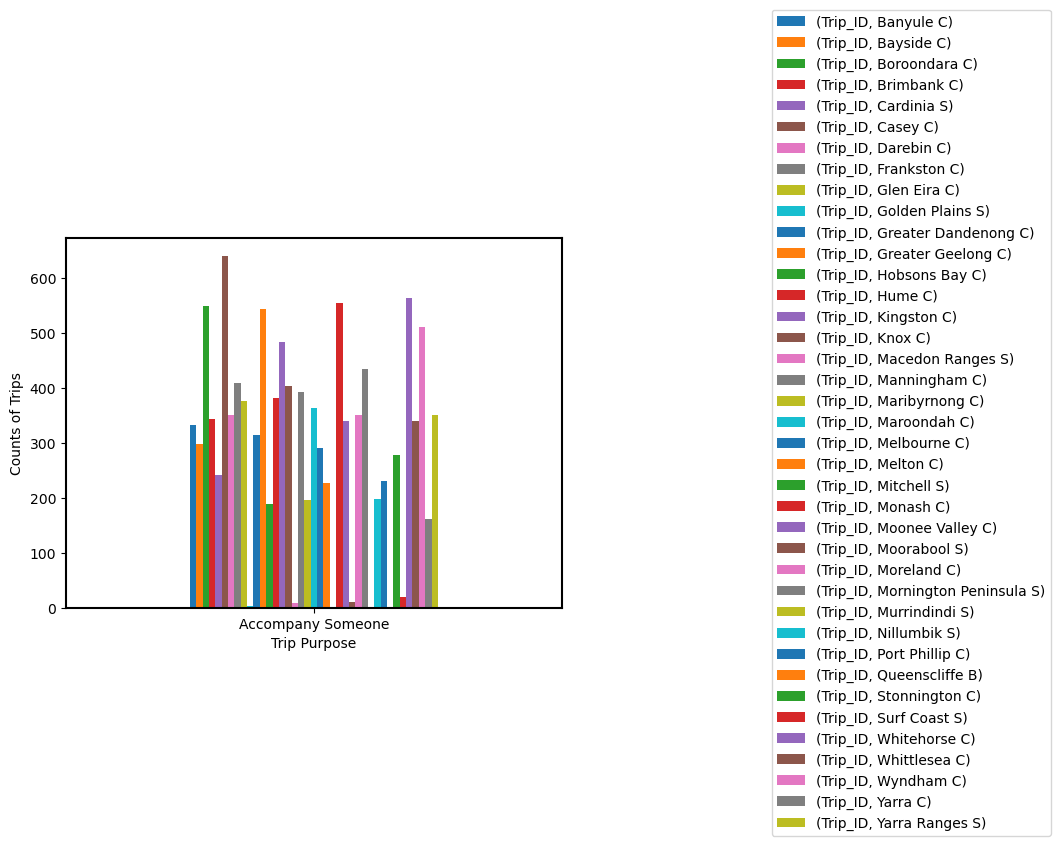

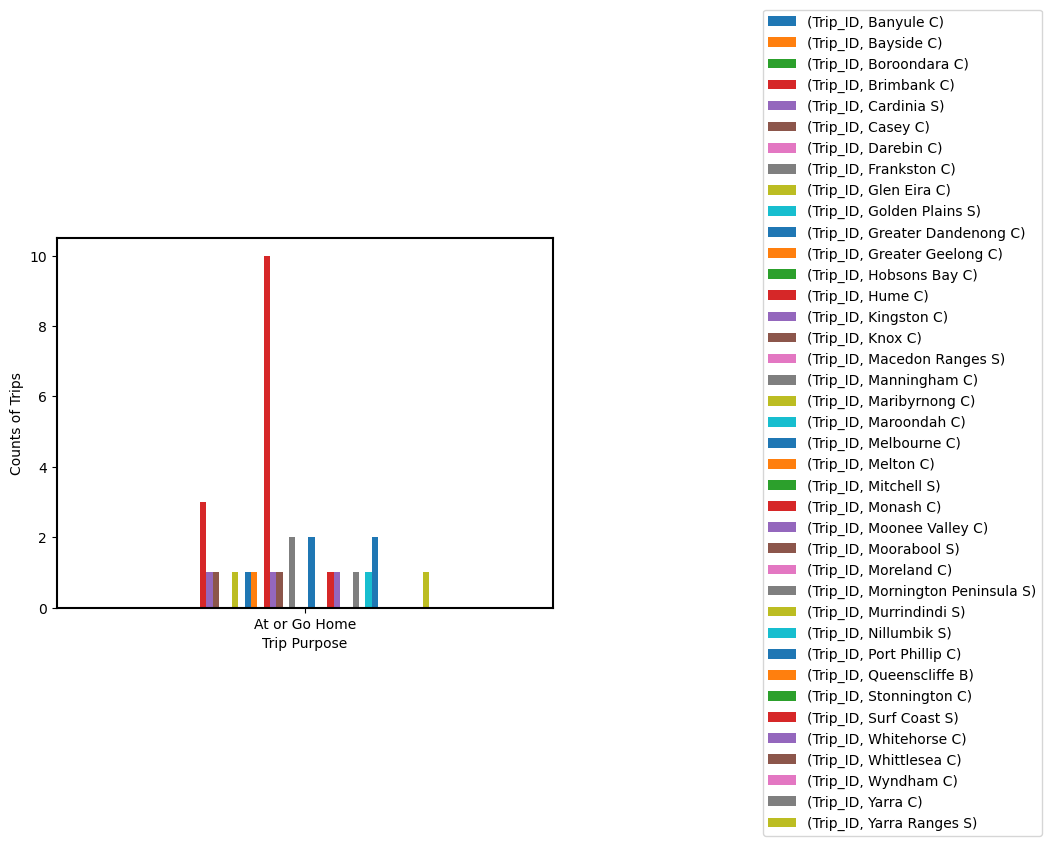

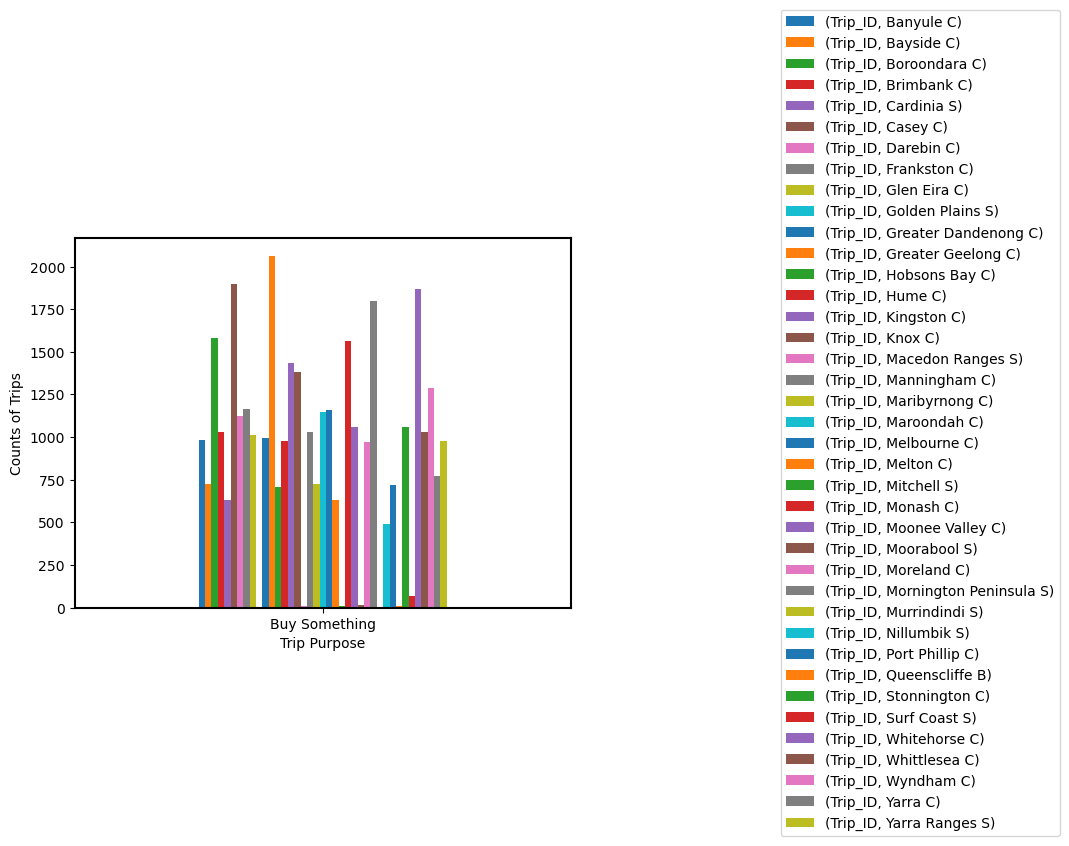

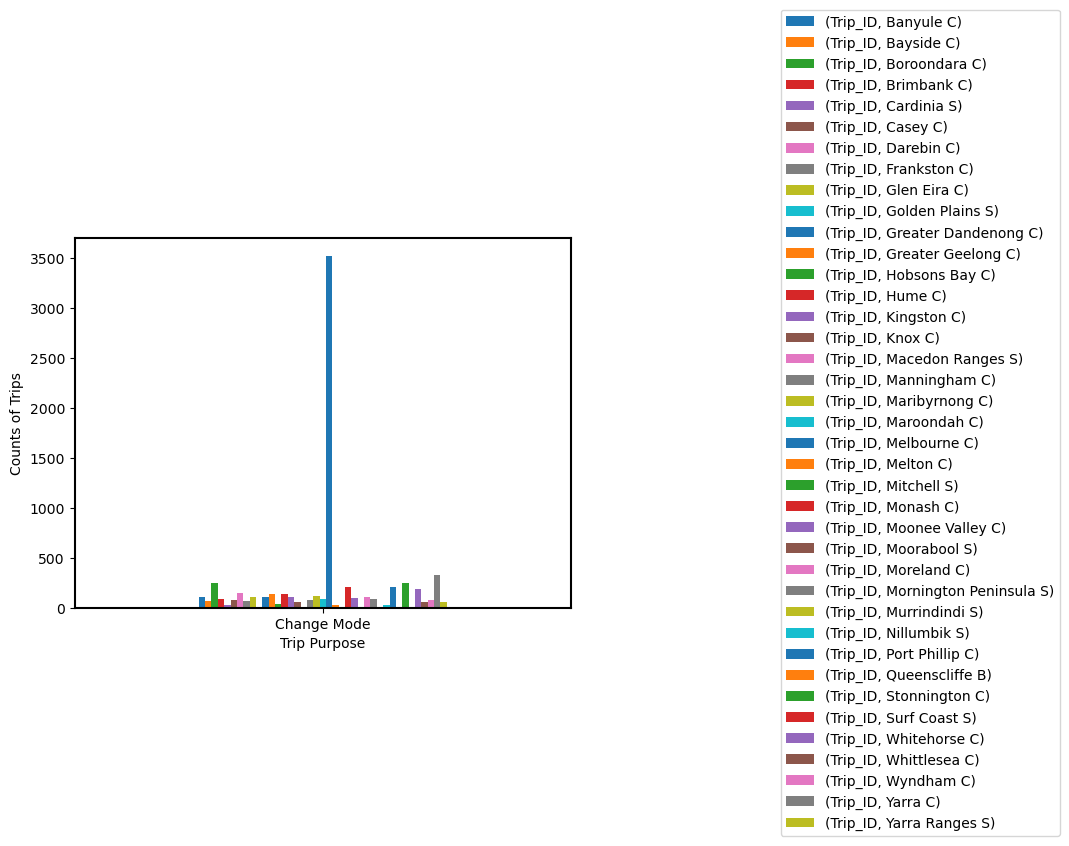

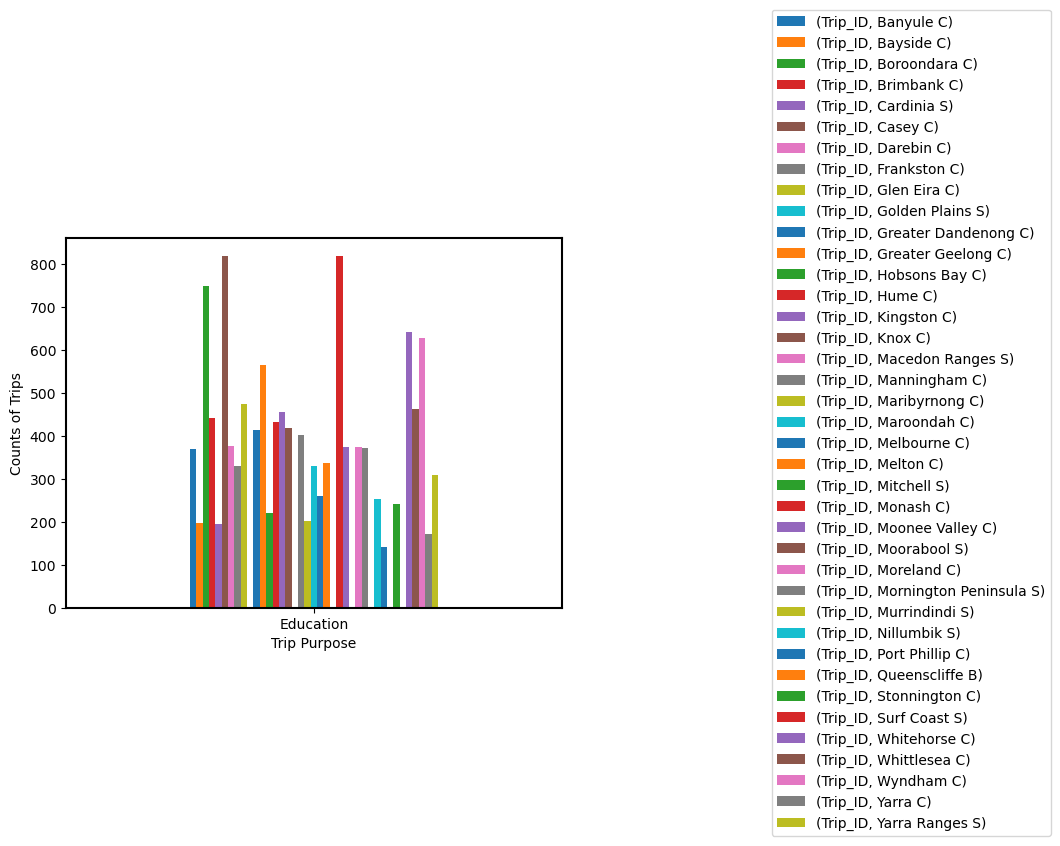

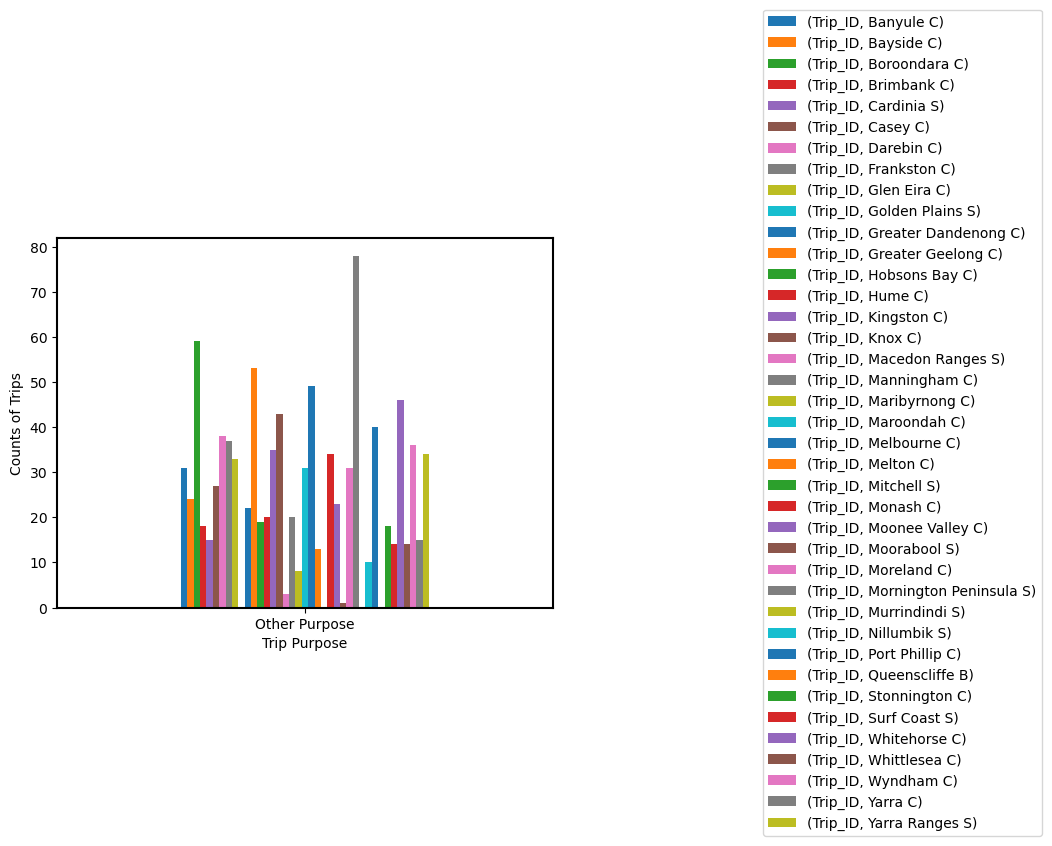

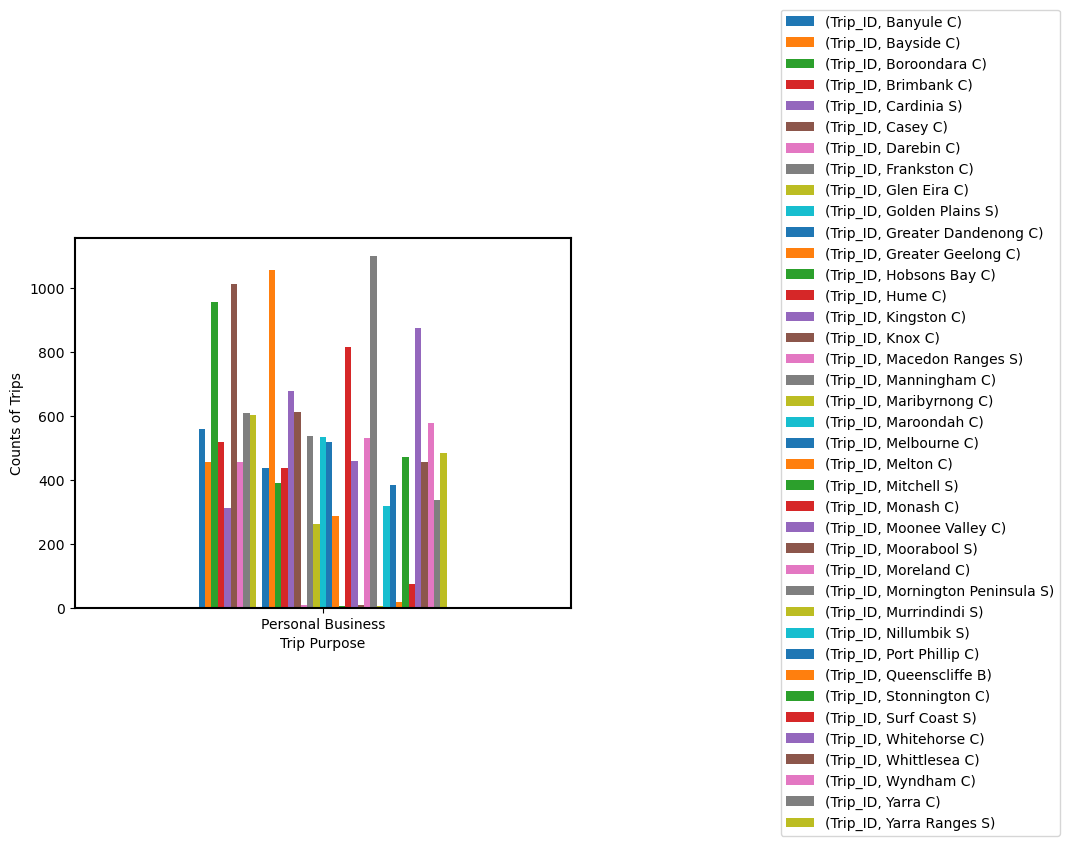

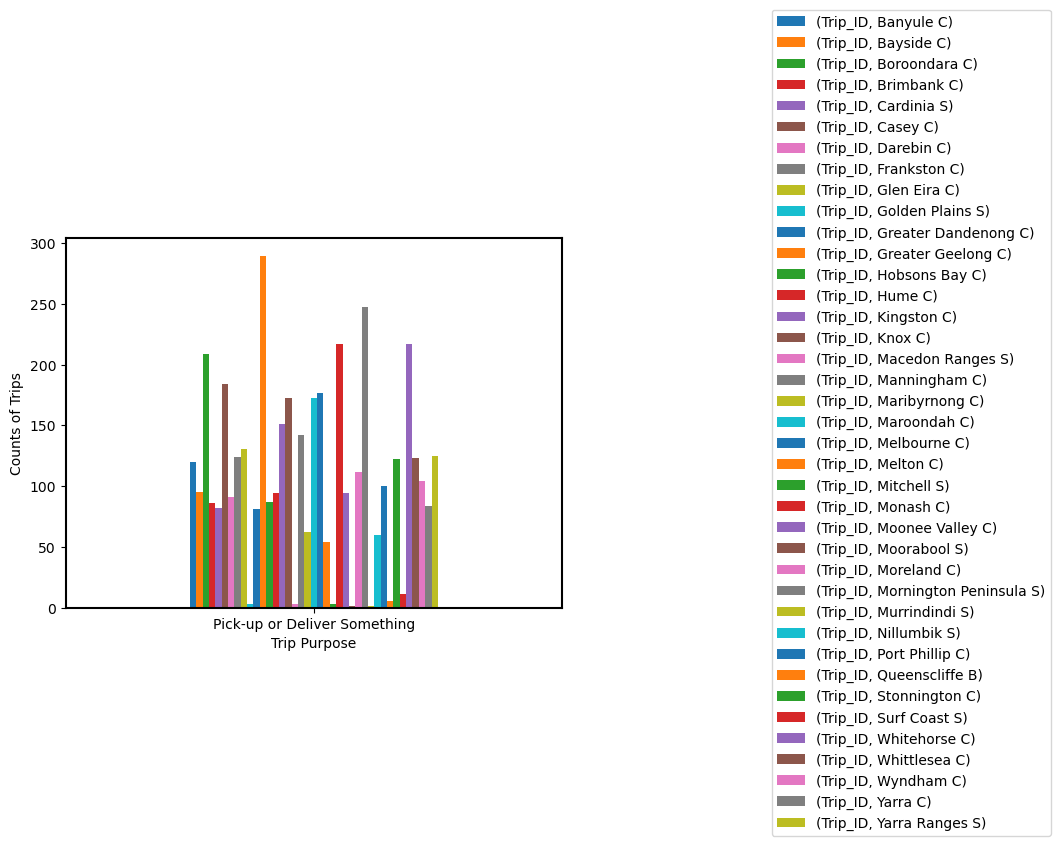

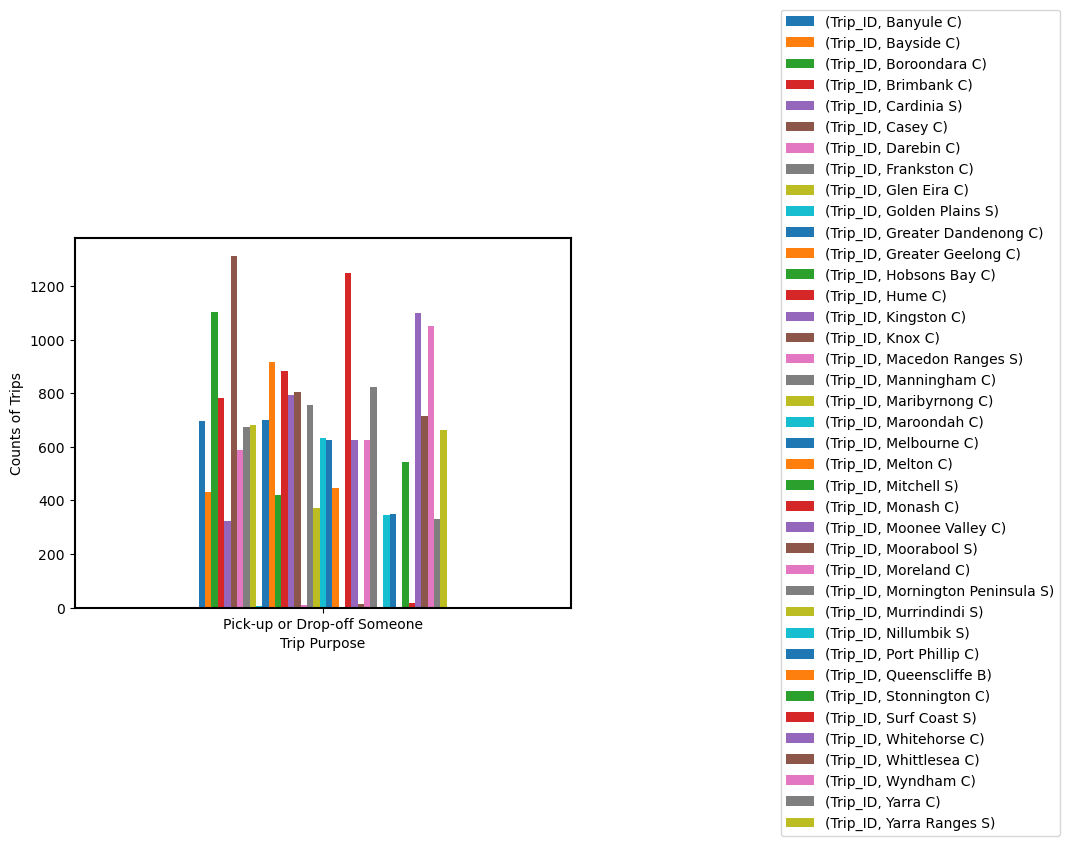

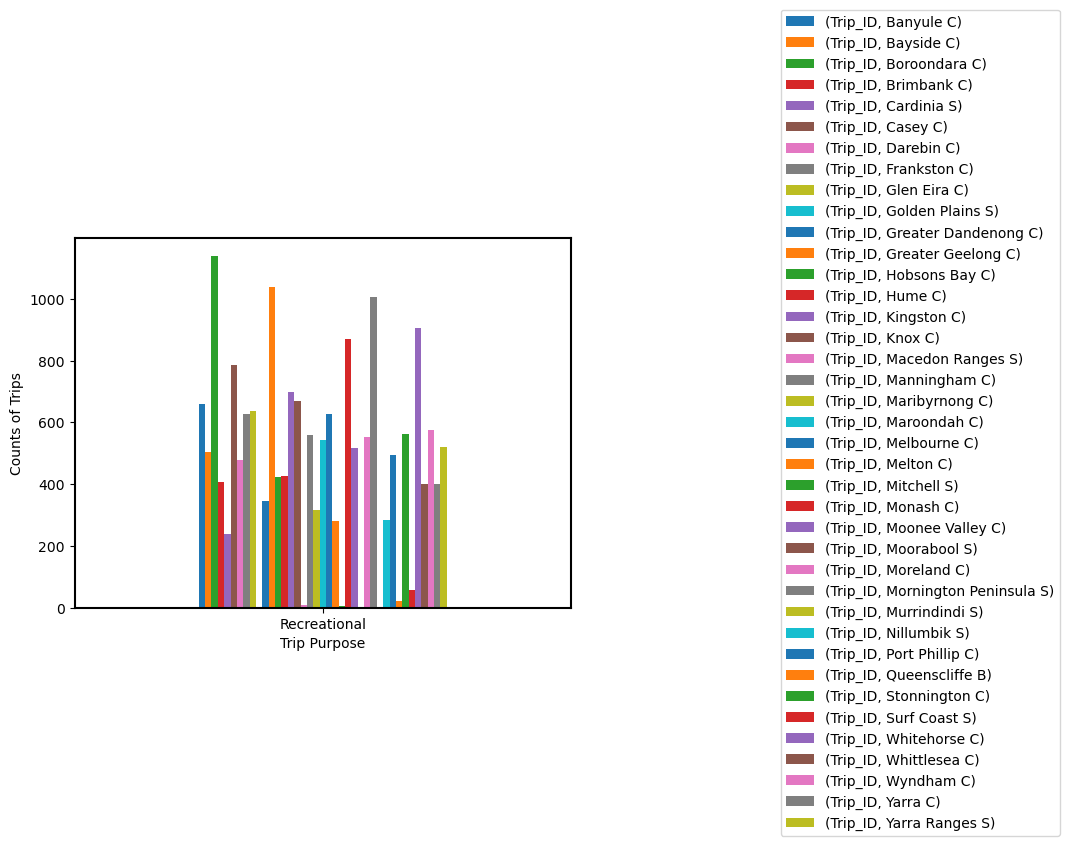

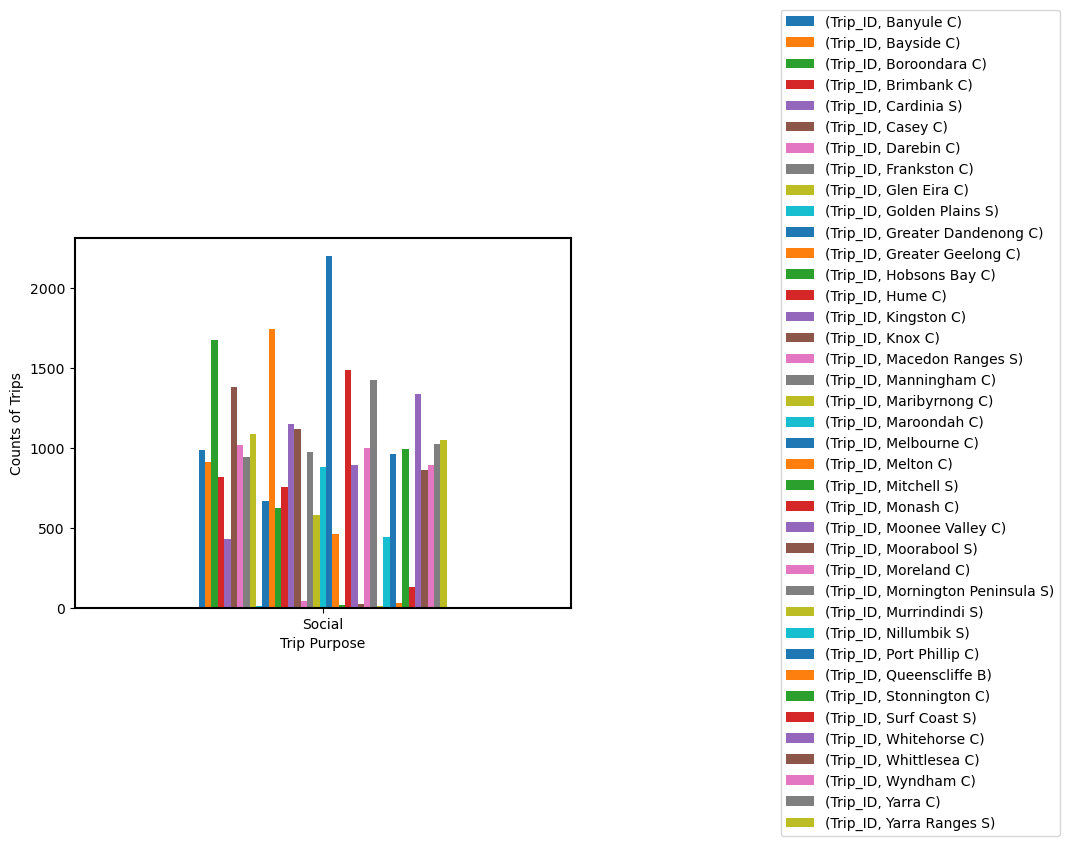

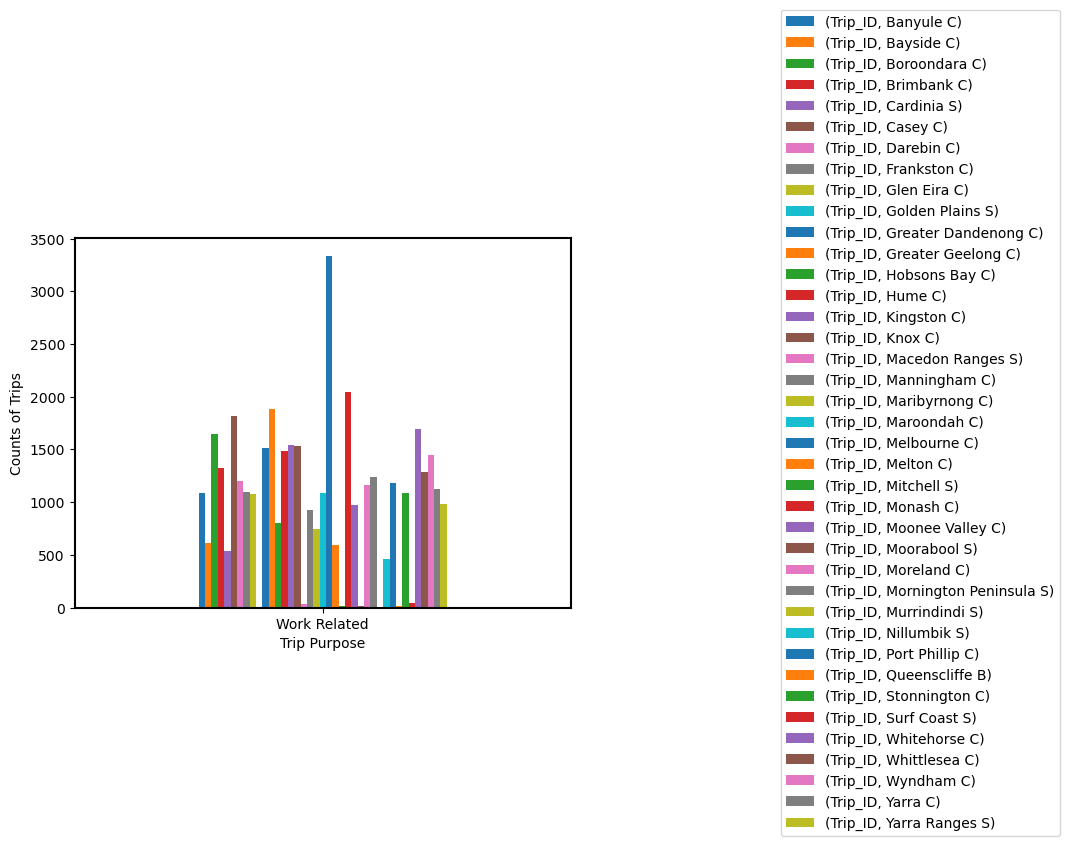

In [125]:
for purpose in lga_trip_purpose['Trip_Purpose'].unique():
    lga_trip_purpose.loc[lga_trip_purpose['Trip_Purpose']==purpose].sort_values(by='Trip_Purpose',axis=0).plot(kind='bar',x ='Trip_Purpose').legend(loc='right',bbox_to_anchor=(2, 0.5))
    plt.xlabel('Trip Purpose')
    plt.ylabel('Counts of Trips')
    plt.xticks(rotation=360)
    plt.savefig(f"Images/Vista_{purpose}_bar_.png",bbox_inches='tight')